In [17]:
import numpy as np
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from qiskit_aer import Aer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import TwoLocal
from qiskit_aer.primitives import Estimator as AerEstimator
from scipy.optimize import minimize

In [33]:
hamiltonians_values = np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian1 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian2 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian3 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian4 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian5 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

Hamiltonian values: [0.34130735 0.55764736 0.94792969 0.85688437]
Hamiltonian values: [0.54933147 0.71485977 0.67166902 0.50939084]
Hamiltonian values: [0.82415126 0.7612936  0.16868698 0.97961387]
Hamiltonian values: [0.02431677 0.70736601 0.75444676 0.10950408]
Hamiltonian values: [0.40584234 0.37805899 0.02400864 0.2099185 ]


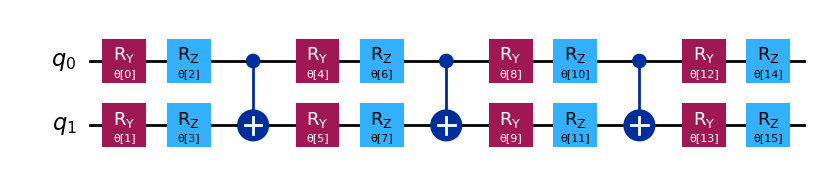

In [38]:
ansatz1 = EfficientSU2(hamiltonian1.num_qubits)
ansatz2 = EfficientSU2(hamiltonian2.num_qubits)
ansatz3 = EfficientSU2(hamiltonian3.num_qubits)
ansatz4 = EfficientSU2(hamiltonian4.num_qubits)
ansatz5 = EfficientSU2(hamiltonian5.num_qubits)
ansatz1.decompose().draw("mpl", style="iqp")

In [39]:
num_params = ansatz1.num_parameters
num_params

16

In [40]:
simulator = Aer.get_backend("aer_simulator")
target = simulator.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
ansatz_isa1 = pm.run(ansatz1)
ansatz_isa2 = pm.run(ansatz2)
ansatz_isa3 = pm.run(ansatz3)
ansatz_isa4 = pm.run(ansatz4)
ansatz_isa5 = pm.run(ansatz5)

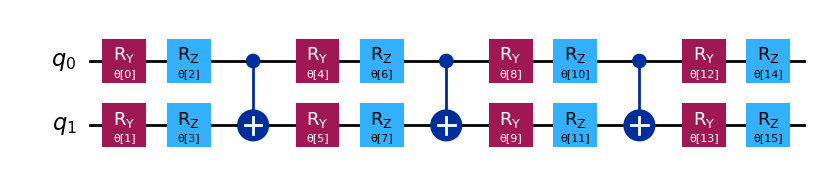

In [41]:
ansatz_isa1.draw(output="mpl", idle_wires=False, style="iqp")

In [ ]:
hamiltonian_isa1 = hamiltonian1.apply_layout(layout=ansatz_isa1.layout)
hamiltonian_isa2 = hamiltonian2.apply_layout(layout=ansatz_isa2.layout)
hamiltonian_isa3 = hamiltonian3.apply_layout(layout=ansatz_isa3.layout)
hamiltonian_isa4 = hamiltonian4.apply_layout(layout=ansatz_isa4.layout)
hamiltonian_isa5 = hamiltonian5.apply_layout(layout=ansatz_isa5.layout)

def cost_func(params, ansatz, hamiltonian, estimator):

    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """

    param_dict = dict(zip(ansatz.parameters, params))
    bound_circuit = ansatz.assign_parameters(param_dict)
    #pub = ansatz.bind_parameters(params)
    result = estimator.run(bound_circuit, observables=[hamiltonian]).result()
    energy = result.values[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [31]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([0.3230482 , 4.60151614, 0.15458595, 3.75316116, 0.29170636,
       0.37157877, 0.17622037, 2.54513626, 6.24684625, 0.68732639,
       2.3380344 , 4.48650762, 0.29624376, 3.21751008, 0.68723187,
       2.03378193])

In [ ]:
estimator = AerEstimator()

res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa1, hamiltonian_isa1, estimator),
    method='COBYLA'
)

Iters. done: 1 [Current cost: 0.31429003906249997]
Iters. done: 2 [Current cost: -0.7510958984375]
Iters. done: 3 [Current cost: -1.2248224609374998]
Iters. done: 4 [Current cost: -0.8359117187499999]
Iters. done: 5 [Current cost: -1.3081658203125]
Iters. done: 6 [Current cost: -0.3460455078124999]
Iters. done: 7 [Current cost: -0.2487226562499999]
Iters. done: 8 [Current cost: -1.075324609375]
Iters. done: 9 [Current cost: 0.03782128906250004]
Iters. done: 10 [Current cost: -0.8063499999999999]
Iters. done: 11 [Current cost: -0.7413789062499999]
Iters. done: 12 [Current cost: -0.6773537109375]
Iters. done: 13 [Current cost: -0.14254746093749998]
Iters. done: 14 [Current cost: -0.63958125]
Iters. done: 15 [Current cost: -1.5320025390624998]
Iters. done: 16 [Current cost: -1.3429058593749998]
Iters. done: 17 [Current cost: -0.8073029296875]
Iters. done: 18 [Current cost: -1.977230859375]
Iters. done: 19 [Current cost: -1.8358218749999997]
Iters. done: 20 [Current cost: -1.95227871093750

In [ ]:
res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa2, hamiltonian_isa2, estimator),
    method='COBYLA'
)

NameError: name 'hamiltonian_isa1' is not defined

In [ ]:
res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa3, hamiltonian_isa3, estimator),
    method='COBYLA'
)

In [ ]:
res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa4, hamiltonian_isa4, estimator),
    method='COBYLA'
)

In [ ]:
res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa5, hamiltonian_isa5, estimator),
    method='COBYLA'
)

In [26]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.4633962890624996
       x: [ 5.849e+00  5.022e+00 ...  5.375e+00  5.980e+00]
    nfev: 148
   maxcv: 0.0

In [27]:
all(cost_history_dict["prev_vector"] == res.x)
cost_history_dict["iters"] == res.nfev

True

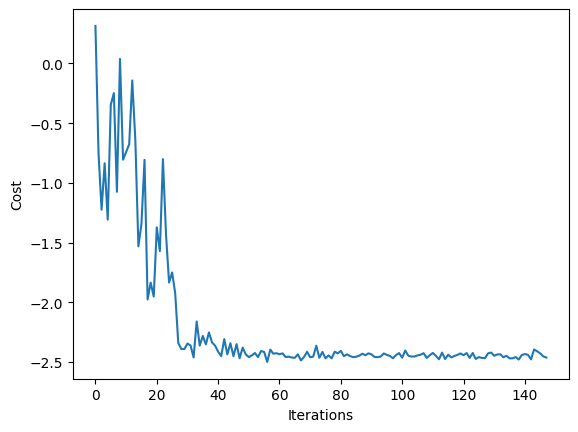

In [44]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()